## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
m_df = pd.merge(study_results, mouse_metadata,  on="Mouse ID")
m_df.head()

# Display the data table for preview


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
num_mice = m_df['Mouse ID'].unique()
num_mice.size

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupes = m_df[m_df.duplicated(['Mouse ID', 'Timepoint'])]



In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dupes


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
m_df = m_df[m_df['Mouse ID'] != 'g989']


In [6]:
# Checking the number of mice in the clean DataFrame.
num_mice = m_df['Mouse ID'].unique()
num_mice.size

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# first rename the tumor column
m_df = m_df.rename(columns={"Tumor Volume (mm3)": "TumorVolume"})

summary_stats = m_df.groupby(['Drug Regimen'])

# Getting all of the individual metrics
tv_mean = summary_stats["TumorVolume"].mean()
tv_median = summary_stats["TumorVolume"].median()
tv_variance = summary_stats["TumorVolume"].var()
tv_stdev = summary_stats["TumorVolume"].std()
tv_sem = summary_stats["TumorVolume"].sem()

sum_stats = pd.DataFrame({"Mean": tv_mean,
                          "Median": tv_median,
                          "Variance": tv_variance,
                          "Std Dev": tv_stdev,
                          "SEM": tv_sem})
sum_stats




,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

ss_df = m_df.groupby(m_df["Drug Regimen"]).TumorVolume.agg(["mean", "median", "var", "std", "sem"])

ss_df


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


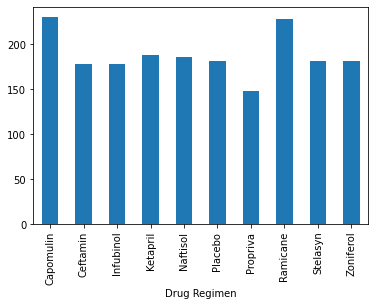

In [35]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
tot_meas = m_df.groupby(m_df["Drug Regimen"]).Timepoint.count()
tot_meas.plot.bar(x="Drug Regimen", y='Timepoint.count()')

## Bar and Pie Charts

In [27]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

tom = m_df.groupby(m_df["Drug Regimen"]).Timepoint.count().reset_index()
tom.head()
#tot_meas = tot_meas.rename(columns={"Drug Regimen": "DrugRegimen"})
#tot_meas
#x_axis = tot_meas['Drug Regimen']
#m_df['Drug Regimen'].unique()

,Drug Regimen,Timepoint
0,Capomulin,230
1,Ceftamin,178
2,Infubinol,178
3,Ketapril,188
4,Naftisol,186


0    Capomulin
1     Ceftamin
2    Infubinol
3     Ketapril
4     Naftisol
5      Placebo
6     Propriva
7     Ramicane
8     Stelasyn
9    Zoniferol
Name: Drug Regimen, dtype: object
0    230
1    178
2    178
3    188
4    186
5    181
6    148
7    228
8    181
9    182
Name: Timepoint, dtype: int64


<BarContainer object of 10 artists>

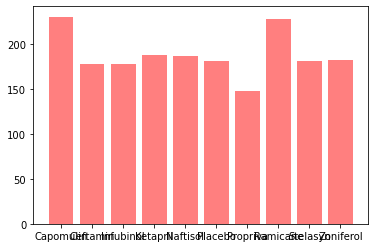

In [33]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis= tom['Drug Regimen']
y_axis= tom['Timepoint']

plt.bar(x_axis, y_axis, color='r', alpha=0.5, align="center")

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
